In [58]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [29]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [32]:
df["target"] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
df[df["target"]==1].head(3),df[df["target"]==0].head(3),df[df["target"]==2].head(3)


(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 50                7.0               3.2                4.7               1.4   
 51                6.4               3.2                4.5               1.5   
 52                6.9               3.1                4.9               1.5   
 
     target  
 50       1  
 51       1  
 52       1  ,
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 
    target  
 0       0  
 1       0  
 2       0  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 100                6.3               3.3                6.0               2.5   
 101                5.8               2.7                5.1               1.9

In [35]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [46]:
%matplotlib inline

df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]


Text(0, 0.5, 'sepal width')

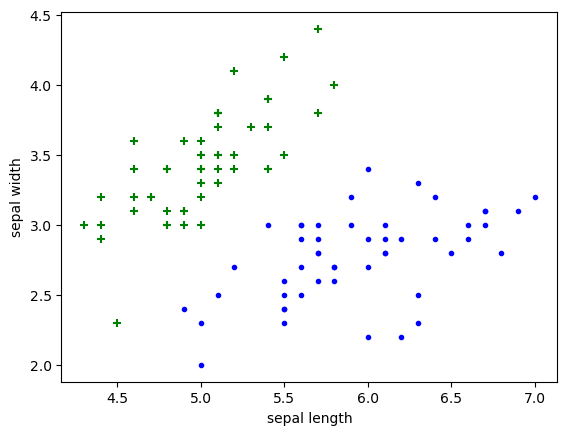

In [47]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color = "green", marker = "+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = "blue", marker = ".")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'sepal width')

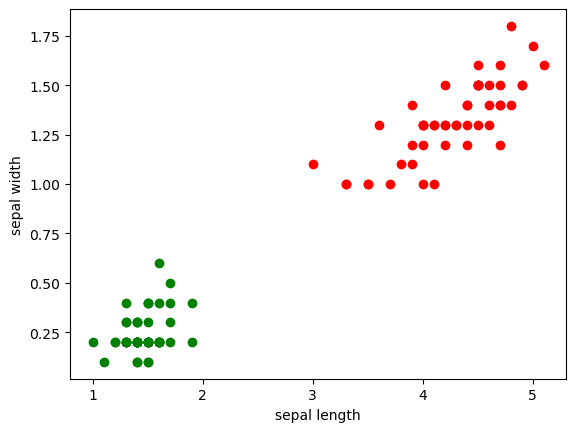

In [54]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color = "green")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color = "red")

plt.xlabel("petal length")
plt.ylabel("petal width")


In [61]:
X = df.drop(columns = ["target", "flower_name"], axis = "columns")
y = df["target"].ravel()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC()
model.fit(X_train, y_train)


SVC(C=10)

In [66]:
score = model.score(X_test, y_test)
score

1.0

In [67]:
y_pred = model.predict(X_test)